In [8]:
from pandas import read_csv
import sys
import pandas as pd
import numpy as np
from numpy import array, argmax
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.base import TransformerMixin
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot
import itertools
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from sklearn import svm


dataset = read_csv("../data/cs_mitx.csv", encoding="ISO-8859-1")

In [11]:
forum=read_csv("../data/course_posts.csv")

In [12]:
df=dataset[['viewed','Completed_or_Not','gender', 'grade', 'nevents', 'ndays_act', 'nplay_video', 'nchapters' ,'age']]

In [13]:
# for normalizing grades and gender missing values


class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

# ^ Do we need this?
df[['grade']] = DataFrameImputer().fit_transform(df[['grade']])
df[['gender']]= DataFrameImputer().fit_transform(df[['gender']])
# print("Videos played:\n", df["nplay_video"])
#df[['last_event_DI']]= DataFrameImputer().fit_transform(df[['last_event_DI']])


C:\Users\Thomas\AppData\Local\Temp\ipykernel_12864\280938079.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['grade']] = DataFrameImputer().fit_transform(df[['grade']])
C:\Users\Thomas\AppData\Local\Temp\ipykernel_12864\280938079.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['gender']]= DataFrameImputer().fit_transform(df[['gender']])


In [14]:
#One-hot encoding for converting gender m/f to 0/1
# define example
data = df[['gender']]
values = array(data)
values.ravel()
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
integer_encoded = integer_encoded.reshape((integer_encoded.shape[0], 1))
df[['gender']]=integer_encoded

C:\Users\Thomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_12864\4248040572.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['gender']]=integer_encoded


In [15]:
df1=forum[['votes','num_words']]
df1=df1[0:59279]
df=pd.concat([df,df1], axis=1)

In [16]:
# df['Completed_or_Not'].value_counts()

In [17]:
df = df.dropna(axis="index", )
X=df.iloc[:,[0,2,3,4,5,6,7,8,9,10]]
y=df.iloc[:,1]
# y.head()

In [18]:
X_headers = X.head()

In [19]:
y.unique()
X=X.values
type(X)

numpy.ndarray

In [20]:
all_classes=['Not Completed','Completed']

In [21]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')




In [22]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.20)
# for i in range(100):
#   print(X_train[i])
# print(X_train.shape)

# [viewed,	gender,	grade,	nevents, ndays_act,	nplay_video,	nchapters,	age,	votes,	num_words]


In [23]:
# [viewed,	gender,	grade	nevents, ndays_act,	nplay_video,	nchapters,	age,	votes,	num_words]
dummy_val =  [1,	0,	0.92,	11000, 32,	197757,	4,	22,	8,	1000]
dummy_val = np.array([dummy_val])

In [24]:
#Support vector machine
clf = svm.SVC(C=0.5, gamma='scale', probability=True)
clf.fit(X_train, y_train)
predictions=clf.predict(X_test)
'''
How to decide probability vs. real-valued scores:
 * https://scikit-learn.org/stable/modules/svm.html#scores-probabilities
 * https://scikit-learn.org/stable/modules/svm.html
 '''
rv_predictions = clf.predict_proba(X_test)
# rv_predictions = clf.decision_function(X_test)

# print("Real-valued:", clf.decision_function(dummy_val))
print("Prediction:", clf.predict(dummy_val))

Prediction: [0]


AUC: 0.723
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11548
           1       0.90      0.45      0.60       308

    accuracy                           0.98     11856
   macro avg       0.94      0.72      0.79     11856
weighted avg       0.98      0.98      0.98     11856

0.9843117408906883
RMS Error 0.01568825910931174


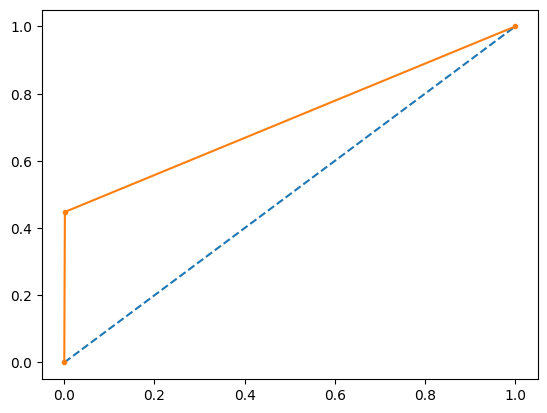

Confusion matrix, without normalization
[[11532    16]
 [  170   138]]


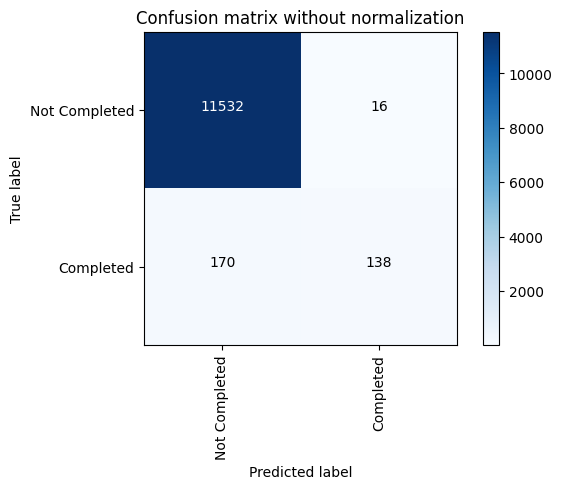

In [25]:


auc = roc_auc_score(y_test, predictions)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, predictions)


print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))
print("RMS Error {}".format(mean_squared_error(y_test, predictions, multioutput = 'uniform_average')))
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr,tpr, marker='.')
# show the plot
pyplot.show()

cnf_matrix=confusion_matrix(y_test,predictions)
plot_confusion_matrix(cnf_matrix,classes=all_classes, title='Confusion matrix without normalization')

AUC: 0.961
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11548
           1       0.90      0.93      0.91       308

    accuracy                           1.00     11856
   macro avg       0.95      0.96      0.95     11856
weighted avg       1.00      1.00      1.00     11856

0.99527665317139
RMS Error 0.004723346828609987


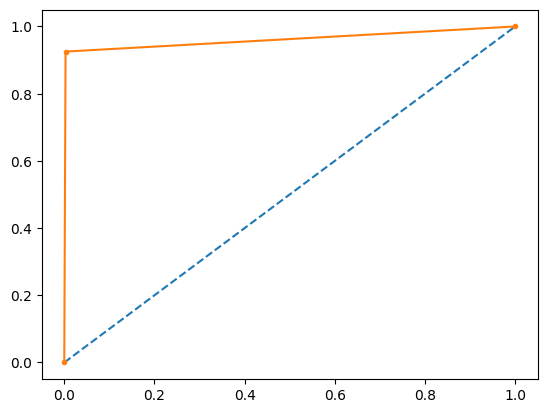

Confusion matrix, without normalization
[[11515    33]
 [   23   285]]


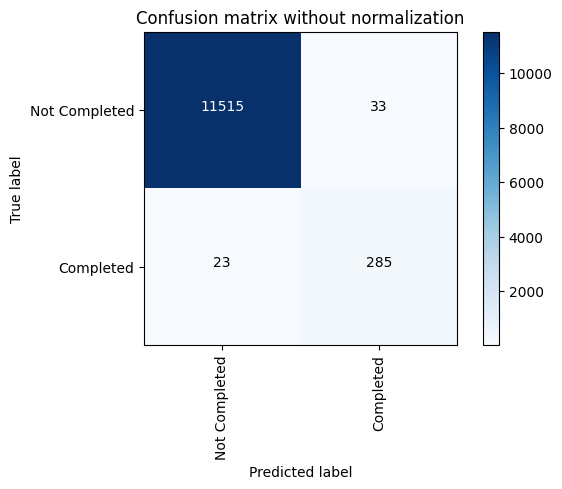

In [26]:
#Multi layer Perceptron

mlp = MLPClassifier(hidden_layer_sizes=(3, 15, 10), max_iter=1000)


mlp.fit(X_train, y_train.values.ravel())
predictions = mlp.predict(X_test)
auc = roc_auc_score(y_test, predictions)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, predictions)


print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))
print("RMS Error {}".format(mean_squared_error(y_test, predictions, multioutput = 'uniform_average')))
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr,tpr, marker='.')
# show the plot
pyplot.show()

cnf_matrix=confusion_matrix(y_test,predictions)
plot_confusion_matrix(cnf_matrix,classes=all_classes, title='Confusion matrix without normalization')

In [27]:
pip install anchor-exp


^C
Note: you may need to restart the kernel to use updated packages.


     ---------------------------------------- 0.0/427.3 kB ? eta -:--:--
     ------------ ------------------------- 143.4/427.3 kB 4.3 MB/s eta 0:00:01
     -------------------------------------  419.8/427.3 kB 6.6 MB/s eta 0:00:01
     -------------------------------------  419.8/427.3 kB 6.6 MB/s eta 0:00:01
     -------------------------------------- 427.3/427.3 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     -------------------------------------- 275.7/275.7 kB 8.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements

In [ ]:
pip install torch transformers spacy && python -m spacy download en_core_web_sm



[From Ribiero's notebook for tabular anchor:
](https://=github.com/marcotcr/anchor/blob/master/notebooks/Anchor%20on%20tabular%20data.ipynb)
```
explainer = anchor_tabular.AnchorTabularExplainer(
    dataset.class_names,
    dataset.feature_names,
    dataset.train,
    dataset.categorical_names) #from ln4 of Ribiero's tabular tutorial
```



In [28]:
from __future__ import print_function
import numpy as np
np.random.seed(1)
import sys
import sklearn
import sklearn.ensemble
%load_ext autoreload
%autoreload 2
from anchor import utils
from anchor import anchor_tabular

In [29]:
#[viewed,	gender,	grade	nevents, ndays_act,	nplay_video,	nchapters,	age,	votes,	num_words]
categorical_names = {
    0: ['Not Viewed','Viewed'],
    1: ['Male', 'Female'],
    2: ['grade	nevents?'],
    3: ['ndays_act?'],
    4: ['nplay_video?'],
    5: ['nchapters?'],
    6: ['age?'],
    7: ['votes?'],
    8: ['num words cat?'],
    9: ['I dont even know?']

}


explainer = anchor_tabular.AnchorTabularExplainer([0,1],X_headers,X_train, categorical_names)

In [32]:
idx = 5
np.random.seed(1)

dummy_val1 = np.array([[1, 0, 0.92, 11000, 32, 197757, 4, 22, 8, 1000]])
dummy_val2 = np.array([[1, 0, 0.99, 11000, 32, 197757, 4, 22, 8, 1000]])

print("Prediction:", clf.predict(dummy_val1))
print("Prediction:", clf.predict(dummy_val2))

print('Prediction: ', explainer.class_names[clf.predict(dummy_val1)[0]])
print('Prediction: ', explainer.class_names[clf.predict(dummy_val2)[0]])

def predict0(inp):
  return clf.predict(inp)[0]


print("X_train[idx]:", X_train[idx])
print("Shape of X_train:", X_train.shape)

exp = explainer.explain_instance(dummy_val1, predict0, threshold=0.95)

X_train[idx]: [ 1.  1.  0. 46.  3.  9.  2. 29.  1.  0.]
Shape of X_train: (47423, 10)


IndexError: invalid index to scalar variable.